This kernel hopes to accomplish many goals, to name a few...

1. Learn/review/explain complex data science topics through write-ups.
2. Do a comprehensive data analysis along with visualizations.
3. Create models that are well equipped to predict better sale price of the houses

**Importing librabries and dataset **

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

['house-prices-advanced-regression-techniques']


 training datset 

In [2]:
## Import Trainning data. 
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


test dataset 

In [3]:
## Import test data.
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#train.shape
#test.shape
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


In [5]:
## Gives use the count of different types of objects.
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

**Checking the missing values**

In [6]:
def missingvalues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(train.isnull().sum().sort_values(ascending = False)/len(df)*100)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [7]:
missingvalues(train)
missingvalues(test)

,Total,Percent
1stFlrSF,0.0,0.0
2ndFlrSF,0.0,0.0
3SsnPorch,0.0,0.0
Alley,1352.0,94.0
BedroomAbvGr,0.0,0.0
...,...,...
Utilities,2.0,0.0
WoodDeckSF,0.0,0.0
YearBuilt,0.0,0.0
YearRemodAdd,0.0,0.0


 Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression

In [8]:
def Plotting_chart (df ,feature):
    ax2 = sns.boxplot(df.loc[:,feature])
    ax2.set_title("box_plot")
    ax1 = sns.distplot(df.loc[:,feature] )
    ax1.set_title('histogram')
    

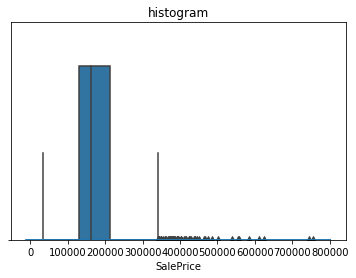

In [9]:
Plotting_chart(train,'SalePrice' )

In [10]:
stats.probplot(train.loc[:,'SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

These charts above can tell us a lot about our target variable.

1. Our target variable, SalePrice is not normally distributed.
2. Our target variable is right-skewed.
3. There are multiple outliers in the variable

In [11]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


**Skewness**

 It is the degree of distortion from the symmetrical bell curve or the normal curve.So, a symmetrical distribution will have a skewness of "0"

There are two types of Skewness: Positive and Negative.
* Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter.
  In positive Skewness the mean and median will be greater than the mode. This is similar to this dataset. So, in Layman's terms, more houses were sold     by less than the average price.
* Negative Skewness means the tail on the left side of the distribution is longer and fatter.
  In negative Skewness the mean and median will be less than the mode.
  Skewness differentiates extreme values in one versus the other tai

![](http://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

**Kurtosis **

In probability theory and statistics, Kurtosis is the measure of the "tailedness" of the probability. distribution of a real-valued random variable. So, In other words it is the measure of the extreme values(outliers) present in the distribution.

There are three types of Kurtosis: Mesokurtic, Leptokurtic and Platykurtic.
* Mesokurtic is similar to normal curve with the standard value of 3. This means that the extreme values of this distrubution is similar to that of a   normal distribution.
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has    thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions.


![](http://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)

In [12]:
# Getting the correlation of all the features with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

These are the predictor variables sorted in a descending order starting with the most correlated one OverallQual.

**SalePrice vs OverallQual**

In [13]:
def scatter_plot(x,y):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (15,10))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x)  

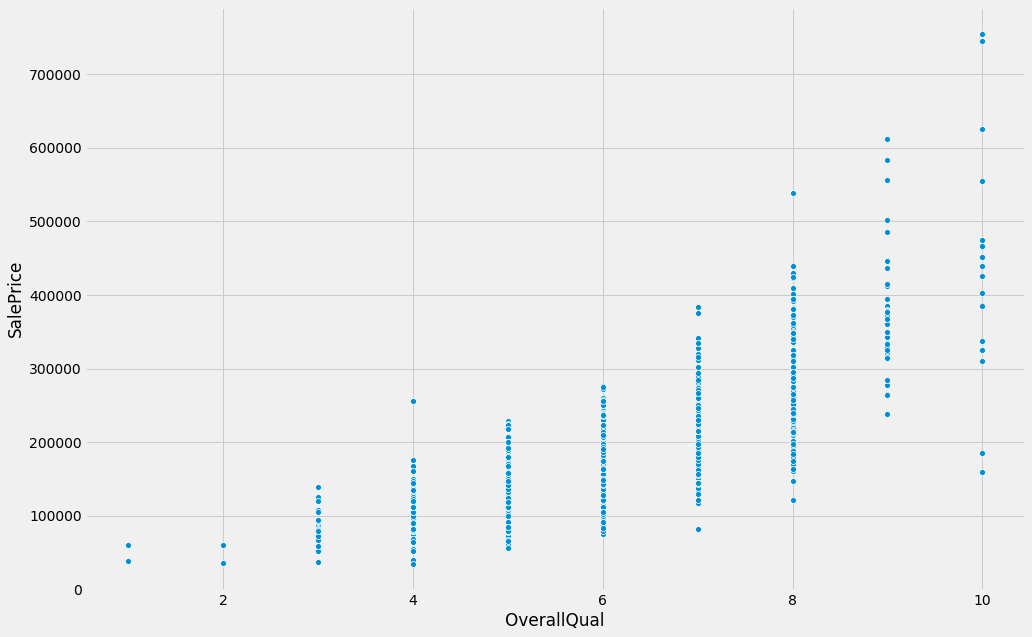

In [14]:
scatter_plot(train.OverallQual,train.SalePrice)

Saleprice v/s GrLiveArea

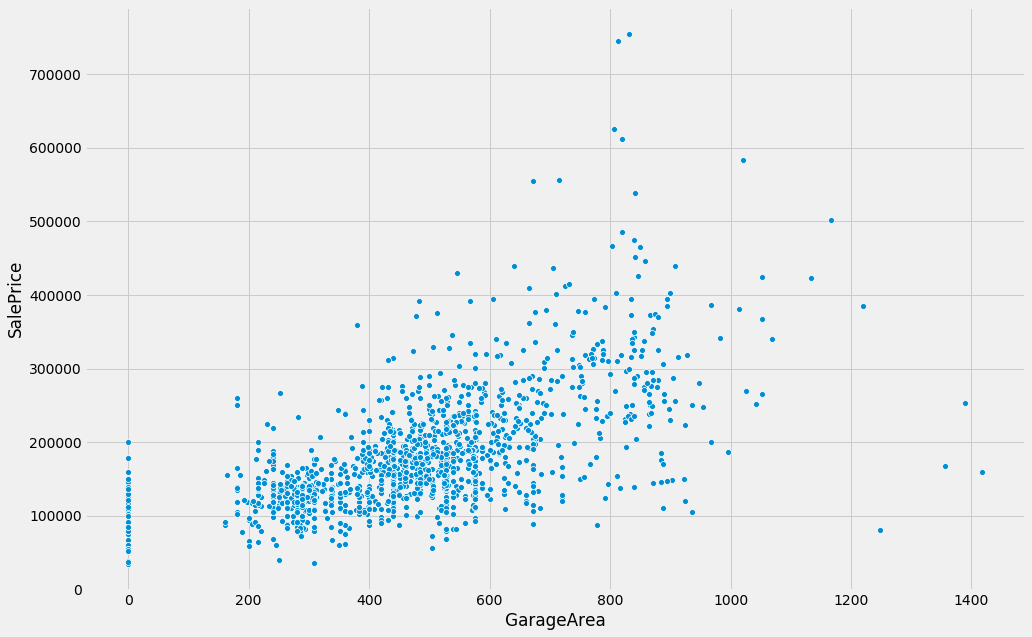

In [15]:
scatter_plot(train.GarageArea,train.SalePrice)

As you can see there are two outliers in the plot above. We will get rid off them later

    SalesPrice v/s totalBsmtSF

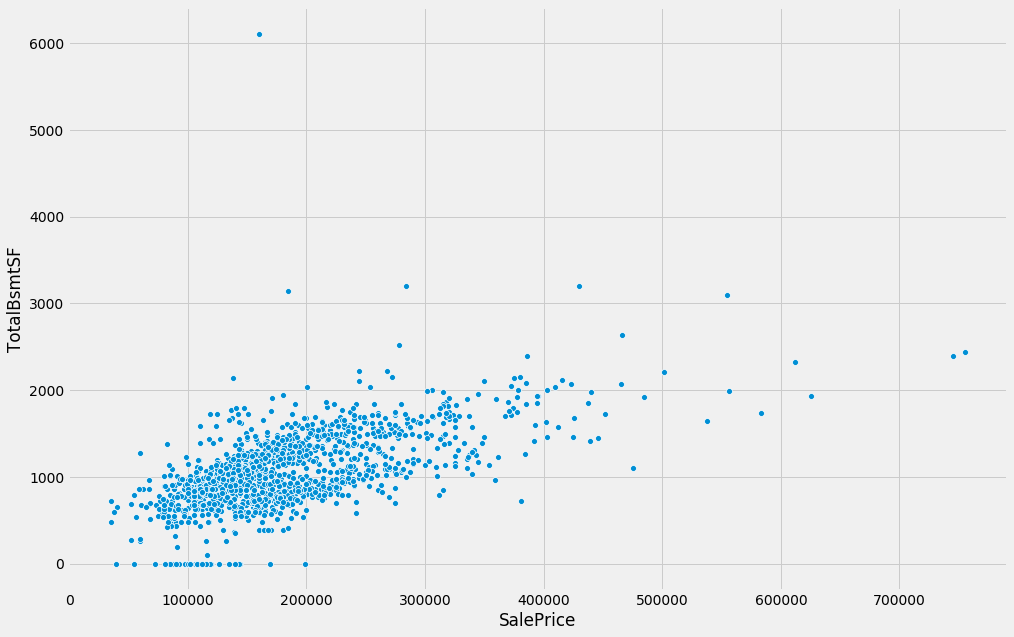

In [16]:
scatter_plot(train.SalePrice, train.TotalBsmtSF)

Salesprice v/s 1stFlrSF

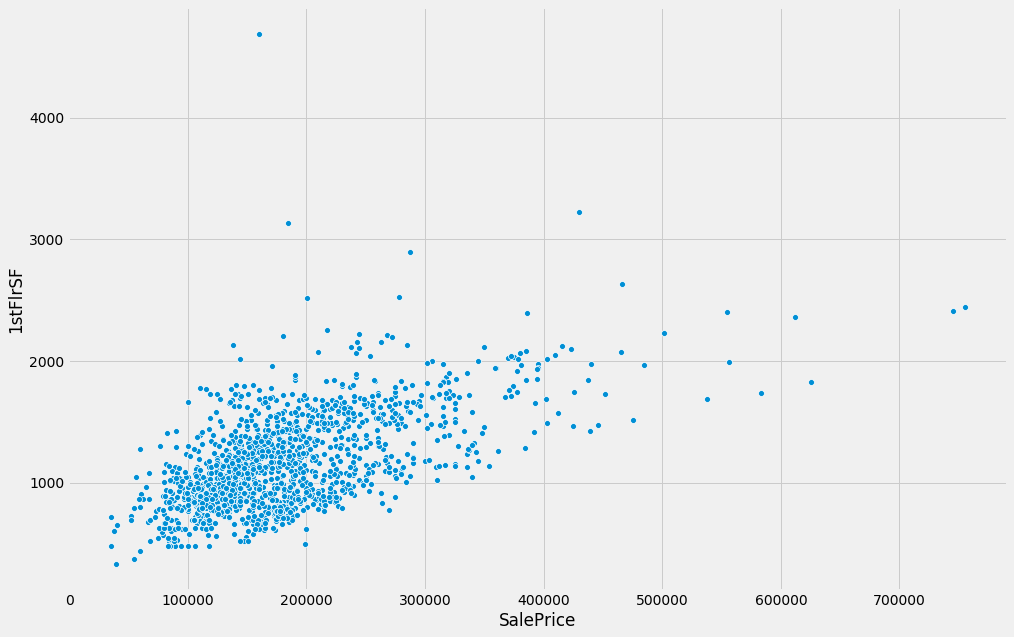

In [17]:
scatter_plot(train.SalePrice,train['1stFlrSF'])

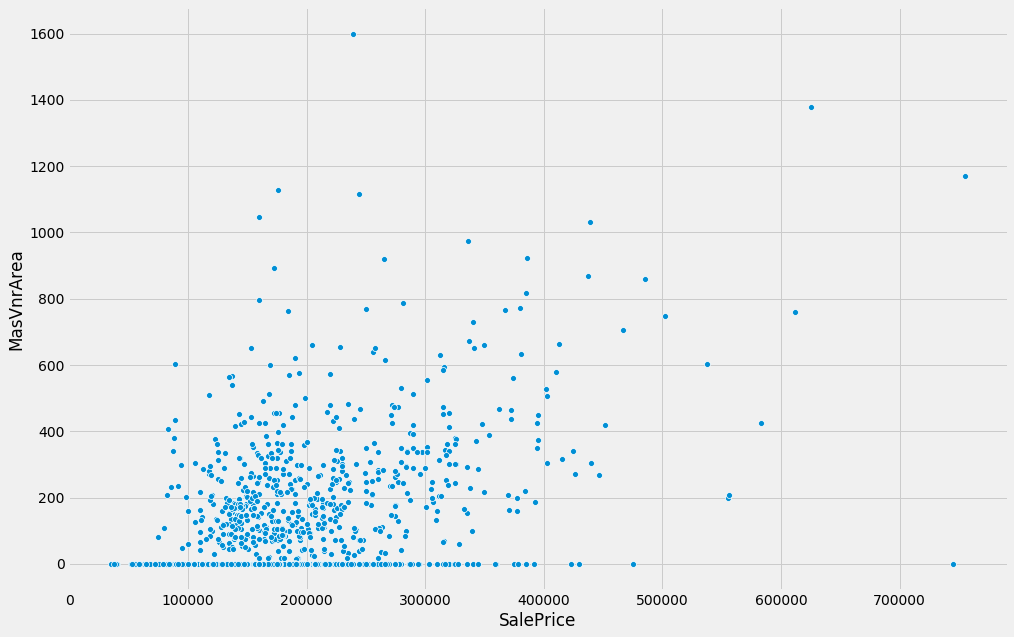

In [18]:
scatter_plot(train.SalePrice, train.MasVnrArea)

* Our target variable shows an unequal level of variance across most predictor(independent) variable values. This is called Heteroscedasticity(more    explanation below); and is a red flag for the multiple linear regression model.
* There are many outliers in the scatter plots above that took my attention.
* The two next to the top right edge of SalePrice vs. GrLivArea seems to follow a trend, which can be explained by saying that "As the prices increased so did the area.
*  However, The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below

Assumptions of Regression
1. Linearity ( Correct functional form )
2. Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).
3. Independence of Errors ( vs Autocorrelation )
4. Multivariate Normality ( Normality of Errors )
5. No or little Multicollinearity.
Since we fit a linear model, we assume that the relationship is linear and the errors, or residuals, are pure random fluctuations around the true line. We assume that the variability in the response(dependent) variable doesn't increase as the value of the predictor(independent) increases, which is the assumptions of equal variance, also known as Homoscedasticity. We also assume that the observations are independent of one another(No Multicollinearity) and a correlation between sequential observations or auto-correlation are not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with one of the different assumptions. Similarly, we can find and fix various assumptions with a few unique techniques.

So, How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line. Let's apply this for each one of them.

* Linearity ( Correct functional form ) Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present.

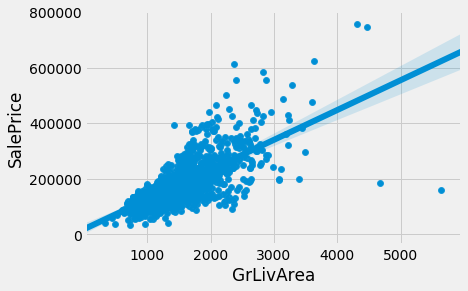

In [19]:
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice)
## Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice)

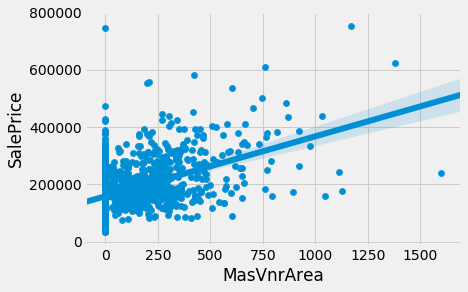

In [20]:
# Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice);

Here we are plotting our target variable with two independent variables GrLivArea and MasVnrArea. It's pretty apparent from the chart that there is a better linear relationship between SalePrice and GrLivArea than SalePrice and MasVnrArea. One thing to take note here, there are some outliers in the dataset. It is imperative to check for outliers since linear regression is sensitive to outlier effects. Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data. In that case, we may need to change our function depending on the data to get the best possible fit. In addition to that, we can also check the residual plot, which tells us how is the error variance across the true line. Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice .

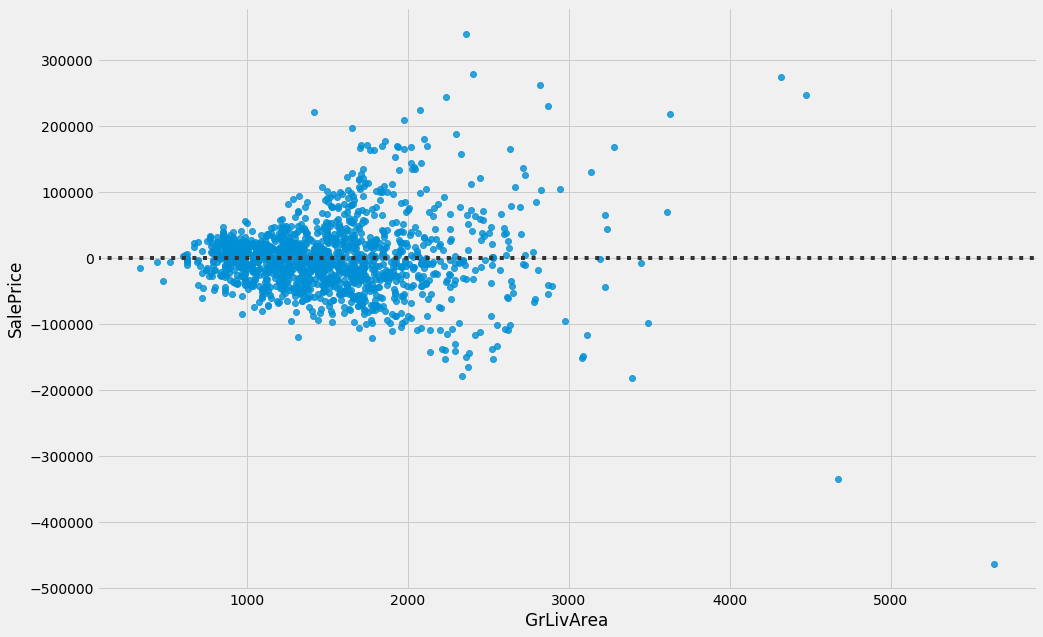

In [21]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (15,10))
sns.residplot(train.GrLivArea, train.SalePrice);

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel. The error plot shows that as GrLivArea value increases the variance also increases, which is the characteristics known as Heteroscedasticity; another assumption of linear regression. Let's break this down.

**Homoscedasticity ( Constant Variance ):** 

The assumption of Homoscedasticity is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable like the residual plot above, we call that Heteroscedasticity. As you can tell, it is the opposite of Homoscedasticity.

![](http://www.dummies.com/wp-content/uploads/415147.image1.jpg)

This plot above is an excellent example of Homoscedasticity. As you can see, the residual variance is the same as the value of the predictor variable increases. One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation. We will do that later.

**Multivariate Normality ( Normality of Errors):** 

The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram or a Q-Q-Plot can check whether the target variable is normally distributed or not. The goodness of fit test, e.g., the Kolmogorov-Smirnov test or can check for normality in the dependent variable. We already know that our target variable does not follow a normal distribution. Let's bring back the three charts to show our target variable

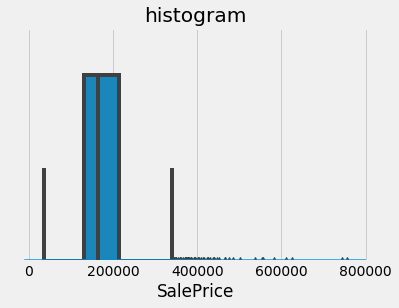

In [22]:
Plotting_chart(train,'SalePrice' )

Now, let's make sure that the target variable follows a normal distribution. 

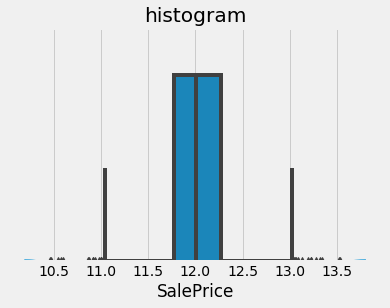

In [23]:
## trainsforming target variable using numpy.log1p, 
train["SalePrice"] = np.log1p(train["SalePrice"])

## Plotting the newly transformed response variable
Plotting_chart(train,'SalePrice' )

As you can see the log transformation removes the normality of errors. This solves some of the other assumptions that we talked about above like Homoscedasticity.

No or Little multicollinearity: Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a viriety of problems including:

The effect of predictor variables estimated by out regression will depend on what other variables are included in our model.
Predictors can have wildly different effectd depending on the observations in our sample, and small changes in samples can reuslt in very different estimated effects.
With very high multicollinearity, the inverse matrix the computer calculates may not be accurate.
We can no longer interpret a coefficient on a variable as the effect on the target of a one unit increase in that variable holding the other variables constant. This is because when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.
Heatmap is an excellent way to identify whether there is multicollinearity or not. The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

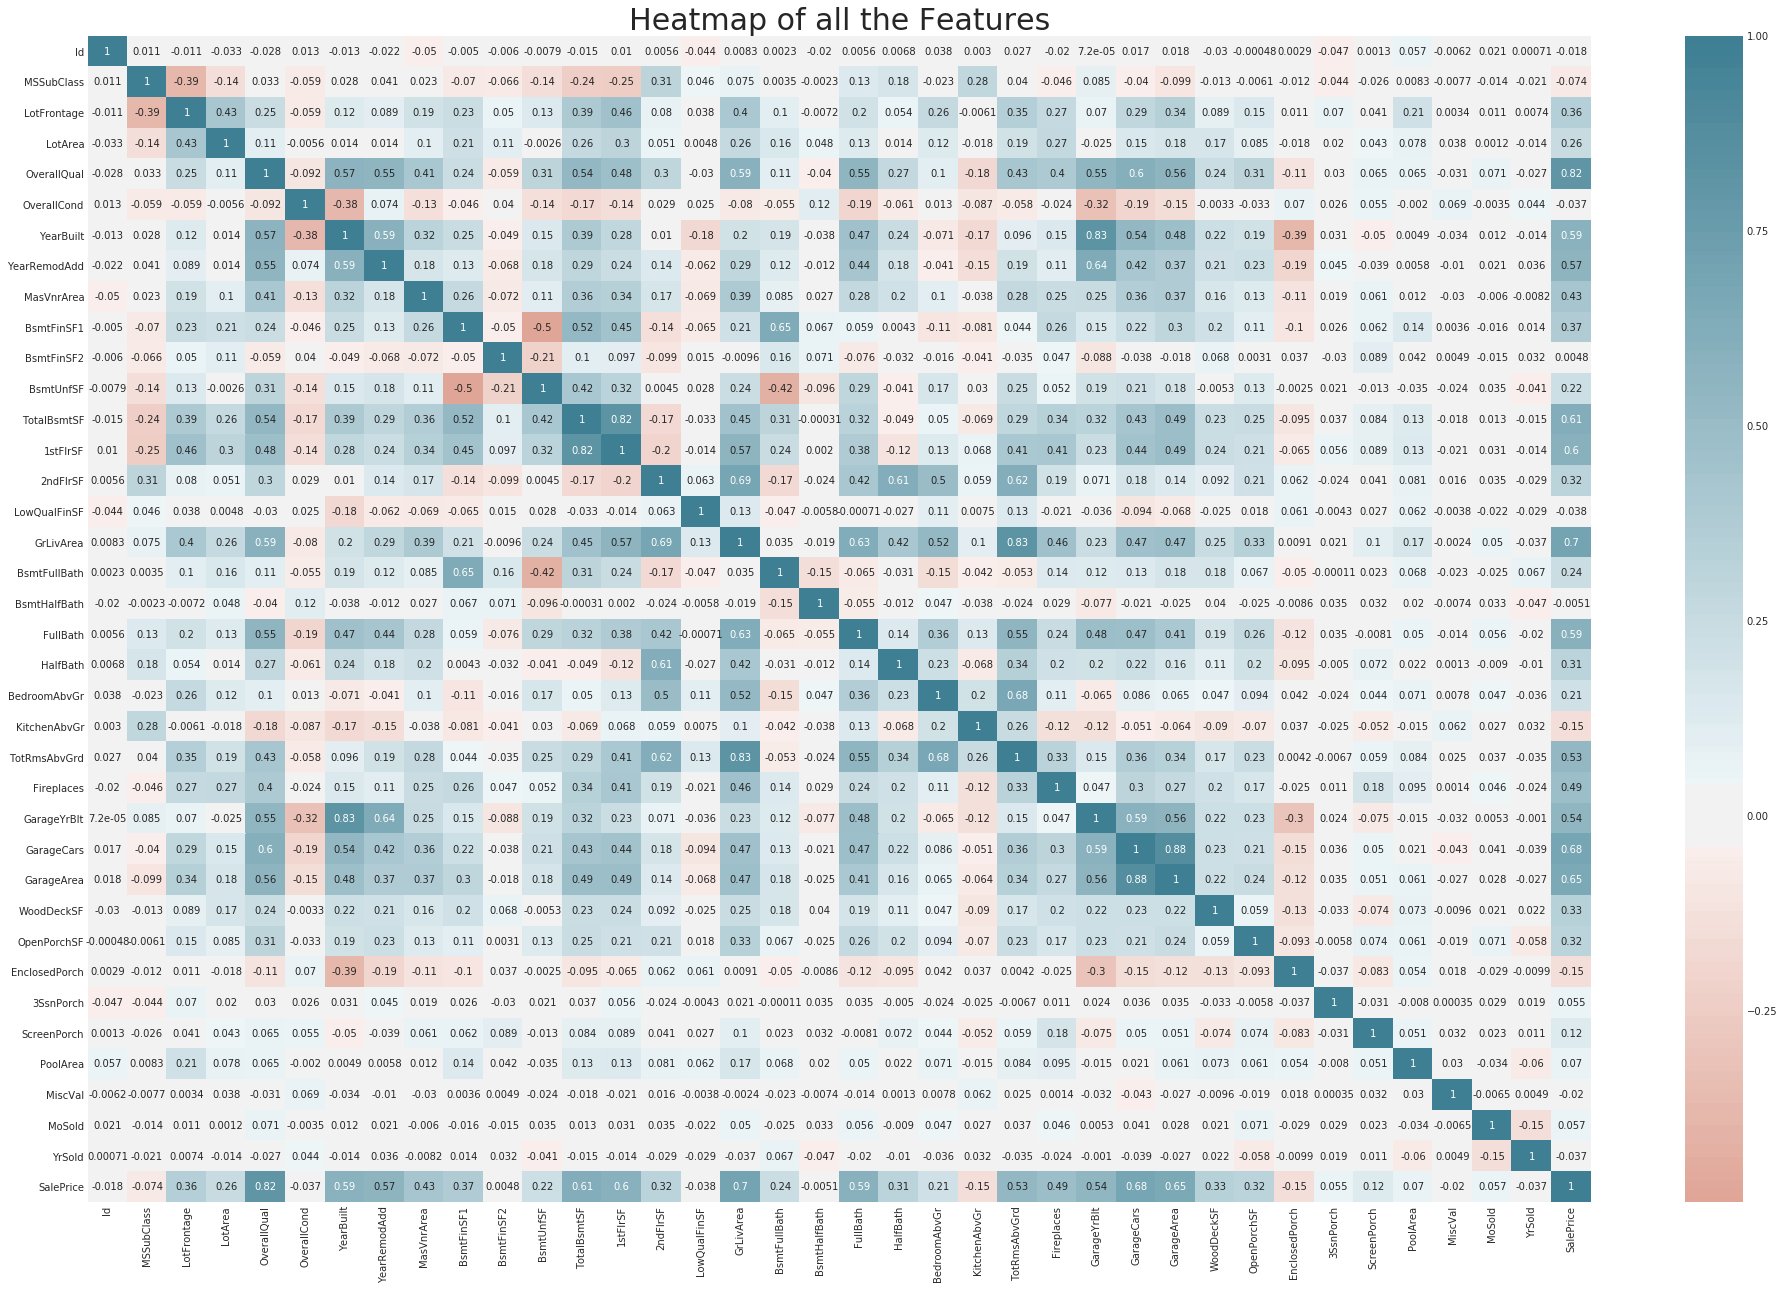

In [24]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

sns.heatmap(train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0);
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

**Observations: **

As we can see, the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and lets models(e.x. Regularization models such as Lasso, Ridge) do the clean up later on. Let's go through some of the correlations that still exists.

There is 0.83 or 83% correlation between GarageYrBlt and YearBuilt.
83% correlation between TotRmsAbvGrd and GrLivArea.
89% correlation between GarageCars and GarageArea.
Similarly many other features such asBsmtUnfSF, FullBath have good correlation with other independent feature but not so much with the dependent feature.
If I were using only multiple linear regression, I would be deleting these features from the dataset to fit better multiple linear regression algorithms. However, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible model. Therefore, we will keep all the features for now.

**feature engineering**

In [25]:
## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [26]:
missingvalues(all_data)

,Total,Percent
1stFlrSF,0.0,0.0
2ndFlrSF,0.0,0.0
3SsnPorch,0.0,0.0
Alley,2721.0,47.0
BedroomAbvGr,0.0,0.0
...,...,...
Utilities,2.0,0.0
WoodDeckSF,0.0,0.0
YearBuilt,0.0,0.0
YearRemodAdd,0.0,0.0


**Inputting missing values**

In [27]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [28]:
## These features are continous variable, we used "0" to replace the null values. 
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)
    
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [29]:
## the "OverallCond" and "OverallQual" of the house. 
# all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
# all_data['OverallQual'] = all_data['OverallQual'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

## Important years and months that should be categorical variables not numerical. 
# all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [30]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [31]:
missingvalues(all_data)

,Total,Percent
1stFlrSF,0.0,0.0
2ndFlrSF,0.0,0.0
3SsnPorch,0.0,0.0
Alley,0.0,47.0
BedroomAbvGr,0.0,0.0
...,...,...
Utilities,0.0,0.0
WoodDeckSF,0.0,0.0
YearBuilt,0.0,0.0
YearRemodAdd,0.0,0.0


**so finally no missing values left.** 

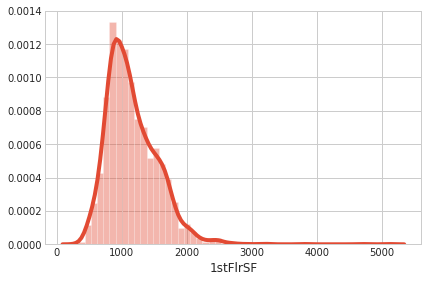

In [32]:
sns.distplot(all_data['1stFlrSF']);

above is left skewed distribution . 
Chekcing skew of data

In [33]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
LotFrontage       1.460429
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
FullBath          0.167606
Id                0.000000
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

In [34]:
## Fixing Skewed features using boxcox transformation. 

def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

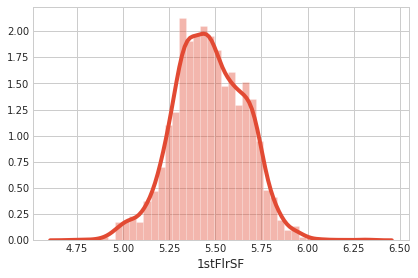

In [35]:
sns.distplot(all_data['1stFlrSF']);

In [36]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

In [37]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
all_data.shape

(2919, 87)

Creating Dummy variable. 


In [39]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2919, 335)

In [40]:
## Dropping the "Id" from train and test set. 
# train.drop(columns=['Id'],axis=1, inplace=True)

train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)
# getting a copy of train
previous_train = train.copy()

In [41]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [42]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [43]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [44]:
X.shape,y.shape, X_sub.shape

((1455, 334), (1455,), (1459, 334))

In [45]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((974, 334), (974,), (481, 334), (481,))

Multiple linear regression 

In [47]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [48]:
## get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

16554977185826175188992.00


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [50]:
print ('%.8f'%scores.mean())

-0.23298019


In [51]:
submission = pd.DataFrame({
        "Id": X_test["Id"],
        "SalePrice": y_pred
    })

submission.to_csv('submission.csv', index=False)